# Feature Engineering newer columns into data

In [1]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import pandas as pd
import seaborn as sns; sns.set_style("dark")
import matplotlib.pyplot as plt
%matplotlib inline

## Training Set

In [3]:
%cd ..

/workspace/asurion_f22_muby


In [4]:
df_transcript_train = pd.read_csv("fe_data_v2/transcript_data/transcript_train_data.csv")
df_transcript_train.head()

,id,sales_offer_date,accepted_flg,encrypted_collated_transcription,month,length,length_3rd,first_3rd,second_3rd,third_3rd
0,e5e4ee3c3c0e9ac72561334e6eb23cc233b1bcd0a0063d...,2022-03-26,False,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,march,7054,2351,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,et you know what I could be able to see here. ...,"see is that the, uh, places is still under th..."
1,ae6128d8d240d28edbcb7eb27256780cf662a2be1aec8c...,2022-03-02,False,"on on Oh, My name is [NAME]. May I please have...",march,7467,2489,"on on Oh, My name is [NAME]. May I please have...","y got all of that Well, their account for hack...","I they're setting up their Myverizon account, ..."
2,4899f9acdb70b0246b2d0ac2871dbcea8267e57b060154...,2022-03-12,False,Hello. We for calling [CLIENT] Tech Coach. My ...,march,3953,1317,Hello. We for calling [CLIENT] Tech Coach. My ...,"know, do I hit. get through the put me throug...","t to Oh, I can I just another phone sir maybe,..."
3,0589751e11caac0eac815faf84f1a366d70b86b78324a2...,2022-03-20,False,Hello. Thank you so much for contacting [CLIEN...,march,6998,2332,Hello. Thank you so much for contacting [CLIEN...,et it many times. Good there is what we call a...,"ing issues being able to send text messages, t..."
4,6c4790cb02e4f556d73436f79268d5c99de50a9acec40e...,2022-03-15,False,Thank you very much Hello? can I can you hear ...,march,7550,2516,Thank you very much Hello? can I can you hear ...,something happened with the features. I had to...,hold. uh ok. rode um. Man. um. woo Well? thank...


### Dealing with Emotion of first third of conversation

In [5]:
%cd parallel_data_first/

/workspace/asurion_f22_muby/parallel_data_first


In [6]:
import os
data_list = os.listdir()
df_first = pd.DataFrame()
for data in data_list:
    if ".csv" in data:
        df = pd.read_csv(data)
        df = df[["id", "emotion_1st"]]
        df_first = pd.concat([df_first,df], axis = 0)

In [7]:
%cd ..

/workspace/asurion_f22_muby


In [8]:
df_transcript_train = df_transcript_train.merge(df_first, how = "inner", on = "id")

In [9]:
len(df_transcript_train)

1044431

In [10]:
df_transcript_train.head()

,id,sales_offer_date,accepted_flg,encrypted_collated_transcription,month,length,length_3rd,first_3rd,second_3rd,third_3rd,emotion_1st
0,e5e4ee3c3c0e9ac72561334e6eb23cc233b1bcd0a0063d...,2022-03-26,False,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,march,7054,2351,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,et you know what I could be able to see here. ...,"see is that the, uh, places is still under th...",sadness
1,ae6128d8d240d28edbcb7eb27256780cf662a2be1aec8c...,2022-03-02,False,"on on Oh, My name is [NAME]. May I please have...",march,7467,2489,"on on Oh, My name is [NAME]. May I please have...","y got all of that Well, their account for hack...","I they're setting up their Myverizon account, ...",neutral
2,4899f9acdb70b0246b2d0ac2871dbcea8267e57b060154...,2022-03-12,False,Hello. We for calling [CLIENT] Tech Coach. My ...,march,3953,1317,Hello. We for calling [CLIENT] Tech Coach. My ...,"know, do I hit. get through the put me throug...","t to Oh, I can I just another phone sir maybe,...",neutral
3,0589751e11caac0eac815faf84f1a366d70b86b78324a2...,2022-03-20,False,Hello. Thank you so much for contacting [CLIEN...,march,6998,2332,Hello. Thank you so much for contacting [CLIEN...,et it many times. Good there is what we call a...,"ing issues being able to send text messages, t...",neutral
4,6c4790cb02e4f556d73436f79268d5c99de50a9acec40e...,2022-03-15,False,Thank you very much Hello? can I can you hear ...,march,7550,2516,Thank you very much Hello? can I can you hear ...,something happened with the features. I had to...,hold. uh ok. rode um. Man. um. woo Well? thank...,neutral


Counter({'neutral': 490622, 'sadness': 345296, 'happiness': 139748, 'anger': 68765})


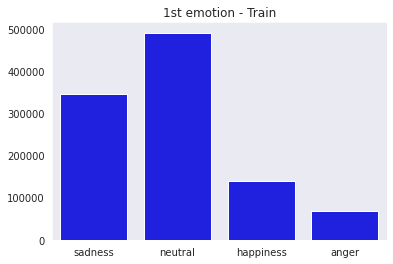

In [11]:
from collections import Counter

#print(Counter(convo_emotion_2nd))

#c = Counter(sample_list) 
#print(c["a"])
convo_emotion_1st = df_transcript_train["emotion_1st"]
print(Counter(convo_emotion_1st))
b = Counter(convo_emotion_1st)
x = list(b.keys())
y = list(b.values())
sns.barplot(x = x, y = y, color = "blue")
plt.title("1st emotion - Train")
plt.show();

In [12]:
len(df_transcript_train["id"].unique())

1044431

### Dealing with second third of conversation

In [13]:
%cd parallel_data_second/

/workspace/asurion_f22_muby/parallel_data_second


In [14]:
import os
data_list = os.listdir()
df_second = pd.DataFrame()
for data in data_list:
    if ".csv" in data:
        df = pd.read_csv(data)
        df = df[["id", "emotion_2nd"]]
        df_second = pd.concat([df_second,df], axis = 0)

In [15]:
df_transcript_train = df_transcript_train.merge(df_second, how = "inner", on = "id")

Counter({'neutral': 587373, 'sadness': 250018, 'happiness': 128881, 'anger': 78159})


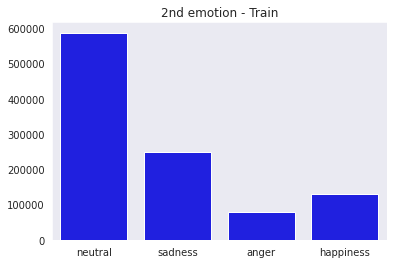

In [16]:
from collections import Counter

#print(Counter(convo_emotion_2nd))

#c = Counter(sample_list) 
#print(c["a"])
convo_emotion_2nd = df_transcript_train["emotion_2nd"]
print(Counter(convo_emotion_2nd))
b = Counter(convo_emotion_2nd)
x = list(b.keys())
y = list(b.values())
sns.barplot(x = x, y = y, color = "blue")
plt.title("2nd emotion - Train")
plt.show();

In [17]:
df_transcript_train.head()

,id,sales_offer_date,accepted_flg,encrypted_collated_transcription,month,length,length_3rd,first_3rd,second_3rd,third_3rd,emotion_1st,emotion_2nd
0,e5e4ee3c3c0e9ac72561334e6eb23cc233b1bcd0a0063d...,2022-03-26,False,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,march,7054,2351,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,et you know what I could be able to see here. ...,"see is that the, uh, places is still under th...",sadness,neutral
1,ae6128d8d240d28edbcb7eb27256780cf662a2be1aec8c...,2022-03-02,False,"on on Oh, My name is [NAME]. May I please have...",march,7467,2489,"on on Oh, My name is [NAME]. May I please have...","y got all of that Well, their account for hack...","I they're setting up their Myverizon account, ...",neutral,neutral
2,4899f9acdb70b0246b2d0ac2871dbcea8267e57b060154...,2022-03-12,False,Hello. We for calling [CLIENT] Tech Coach. My ...,march,3953,1317,Hello. We for calling [CLIENT] Tech Coach. My ...,"know, do I hit. get through the put me throug...","t to Oh, I can I just another phone sir maybe,...",neutral,neutral
3,0589751e11caac0eac815faf84f1a366d70b86b78324a2...,2022-03-20,False,Hello. Thank you so much for contacting [CLIEN...,march,6998,2332,Hello. Thank you so much for contacting [CLIEN...,et it many times. Good there is what we call a...,"ing issues being able to send text messages, t...",neutral,sadness
4,6c4790cb02e4f556d73436f79268d5c99de50a9acec40e...,2022-03-15,False,Thank you very much Hello? can I can you hear ...,march,7550,2516,Thank you very much Hello? can I can you hear ...,something happened with the features. I had to...,hold. uh ok. rode um. Man. um. woo Well? thank...,neutral,anger


In [18]:
%cd ..

/workspace/asurion_f22_muby


### Dealing with third third of conversation

In [19]:
%cd parallel_data_third/

/workspace/asurion_f22_muby/parallel_data_third


In [20]:
import os
data_list = os.listdir()
df_third = pd.DataFrame()
for data in data_list:
    if ".csv" in data:
        df = pd.read_csv(data)
        df = df[["id", "emotion_3rd"]]
        df_third = pd.concat([df_third,df], axis = 0)

In [21]:
df_transcript_train = df_transcript_train.merge(df_third, how = "inner", on = "id")

Counter({'neutral': 616305, 'happiness': 181012, 'sadness': 179142, 'anger': 67972})


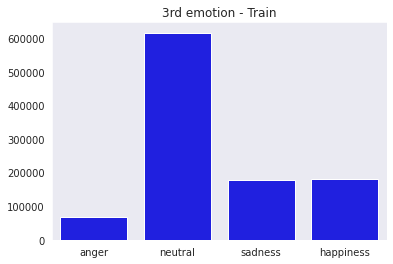

In [22]:
from collections import Counter

#print(Counter(convo_emotion_2nd))

#c = Counter(sample_list) 
#print(c["a"])
convo_emotion_3rd = df_transcript_train["emotion_3rd"]
print(Counter(convo_emotion_3rd))
b = Counter(convo_emotion_3rd)
x = list(b.keys())
y = list(b.values())
sns.barplot(x = x, y = y, color = "blue")
plt.title("3rd emotion - Train")
plt.show()

In [23]:
df_transcript_train.head()

,id,sales_offer_date,accepted_flg,encrypted_collated_transcription,month,length,length_3rd,first_3rd,second_3rd,third_3rd,emotion_1st,emotion_2nd,emotion_3rd
0,e5e4ee3c3c0e9ac72561334e6eb23cc233b1bcd0a0063d...,2022-03-26,False,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,march,7054,2351,ok Thank for calling [CLIENT] Tech Hello? Hi. ...,et you know what I could be able to see here. ...,"see is that the, uh, places is still under th...",sadness,neutral,anger
1,ae6128d8d240d28edbcb7eb27256780cf662a2be1aec8c...,2022-03-02,False,"on on Oh, My name is [NAME]. May I please have...",march,7467,2489,"on on Oh, My name is [NAME]. May I please have...","y got all of that Well, their account for hack...","I they're setting up their Myverizon account, ...",neutral,neutral,neutral
2,4899f9acdb70b0246b2d0ac2871dbcea8267e57b060154...,2022-03-12,False,Hello. We for calling [CLIENT] Tech Coach. My ...,march,3953,1317,Hello. We for calling [CLIENT] Tech Coach. My ...,"know, do I hit. get through the put me throug...","t to Oh, I can I just another phone sir maybe,...",neutral,neutral,neutral
3,0589751e11caac0eac815faf84f1a366d70b86b78324a2...,2022-03-20,False,Hello. Thank you so much for contacting [CLIEN...,march,6998,2332,Hello. Thank you so much for contacting [CLIEN...,et it many times. Good there is what we call a...,"ing issues being able to send text messages, t...",neutral,sadness,sadness
4,6c4790cb02e4f556d73436f79268d5c99de50a9acec40e...,2022-03-15,False,Thank you very much Hello? can I can you hear ...,march,7550,2516,Thank you very much Hello? can I can you hear ...,something happened with the features. I had to...,hold. uh ok. rode um. Man. um. woo Well? thank...,neutral,anger,neutral


In [24]:
%cd ..

/workspace/asurion_f22_muby


### Testing Data

In [25]:
df_transcript_test = pd.read_csv("fe_data_v2/transcript_data/transcript_test_data.csv")

In [26]:
%cd parallel_data_test/

/workspace/asurion_f22_muby/parallel_data_test


In [27]:
df_test_emotion1 = pd.read_csv("test_1.csv")
df_first = df_test_emotion1[["id","emotion_1st"]]
df_test_emotion2 = pd.read_csv("test_2.csv")
df_second = df_test_emotion2[["id","emotion_2nd"]]
df_test_emotion3 = pd.read_csv("test_3.csv")
df_third = df_test_emotion3[["id","emotion_3rd"]]

In [28]:
df_transcript_test = df_transcript_test.merge(df_first, on = "id", how = "inner")
df_transcript_test = df_transcript_test.merge(df_second, on = "id", how = "inner")
df_transcript_test = df_transcript_test.merge(df_third, on = "id", how = "inner")

In [29]:
df_transcript_test.head()

,id,sales_offer_date,accepted_flg,encrypted_collated_transcription,month,length,length_3rd,first_3rd,second_3rd,third_3rd,emotion_1st,emotion_2nd,emotion_3rd
0,4ea0f36550494fca16e9cde513b6981a0b276dc09b8dd9...,2022-07-15,False,hi Thank for calling [CLIENT] coach [CLIENT]. ...,july,19202,6400,hi Thank for calling [CLIENT] coach [CLIENT]. ...,r the eleven pro max of the stock issue. but l...,. However as per Ok. checking here gives it's ...,sadness,neutral,happiness
1,281a94c5a1b46b125f590644613579e36304ae9cbaf75a...,2022-07-04,False,Thank you for calling [CLIENT] Tech Coach. My ...,july,8179,2726,Thank you for calling [CLIENT] Tech Coach. My ...,e go back inside. because I don't know the Wif...,n one of those. Hold on is it's not it's zero ...,neutral,neutral,neutral
2,a44023139d02e9c8670acbfeeee97d4e158196771d09f7...,2022-07-30,False,Hi. Thank you for calling [CLIENT] Tech Coach....,july,3655,1218,Hi. Thank you for calling [CLIENT] Tech Coach....,"in, it starts charging for a minute then stop...",my data from my old phone and it just won't le...,neutral,sadness,sadness
3,1336eca614e19d8e1540b8120062504a9d3f728609dcc1...,2022-07-21,False,Good afternoon. Thank you for calling [CLIENT]...,july,9055,3018,Good afternoon. Thank you for calling [CLIENT]...,o come up so I can send you that message. Hold...,then I don't want to have you sign out. don't ...,happiness,neutral,anger
4,5188a2fd5ca86d4e9a40ea308ea7f938fce1bf06484dfa...,2022-07-06,False,Good for your amount of [CLIENT]. tech coach y...,july,2318,772,Good for your amount of [CLIENT]. tech coach y...,i would be sent past. Ok. uh Gmail account? Ok...,de to text to? Your to play your mind. See. ha...,happiness,neutral,neutral


In [30]:
len(df_transcript_test)

218213

Counter({'neutral': 97007, 'sadness': 76769, 'happiness': 29631, 'anger': 14806})


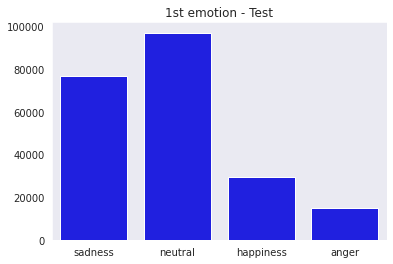

In [31]:
from collections import Counter

#print(Counter(convo_emotion_2nd))

#c = Counter(sample_list) 
#print(c["a"])
convo_emotion_1st= df_transcript_test["emotion_1st"]
print(Counter(convo_emotion_1st))
b = Counter(convo_emotion_1st)
x = list(b.keys())
y = list(b.values())
sns.barplot(x = x, y = y, color = "blue")
plt.title("1st emotion - Test")
plt.show();

Counter({'neutral': 120599, 'sadness': 53557, 'happiness': 27523, 'anger': 16534})


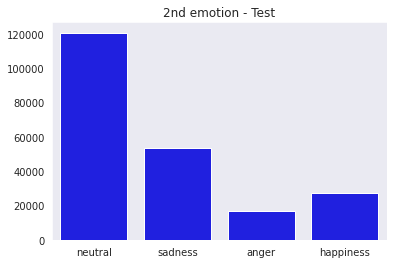

In [32]:
from collections import Counter

#print(Counter(convo_emotion_2nd))

#c = Counter(sample_list) 
#print(c["a"])
convo_emotion_2nd = df_transcript_test["emotion_2nd"]
print(Counter(convo_emotion_2nd))
b = Counter(convo_emotion_2nd)
x = list(b.keys())
y = list(b.values())
sns.barplot(x = x, y = y, color = "blue")
plt.title("2nd emotion - Test")
plt.show();

Counter({'neutral': 126643, 'happiness': 38738, 'sadness': 38224, 'anger': 14608})


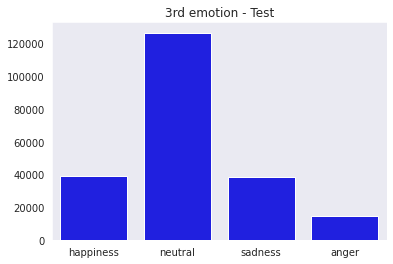

In [33]:
from collections import Counter

#print(Counter(convo_emotion_2nd))

#c = Counter(sample_list) 
#print(c["a"])
convo_emotion_3rd = df_transcript_test["emotion_3rd"]
print(Counter(convo_emotion_3rd))
b = Counter(convo_emotion_3rd)
x = list(b.keys())
y = list(b.values())
sns.barplot(x = x, y = y, color = "blue")
plt.title("3rd emotion - Test")
plt.show();

In [34]:
%cd ..

/workspace/asurion_f22_muby


## Saving new data to transcript folder

In [36]:
df_train = df_transcript_train[["id","emotion_1st","emotion_2nd", "emotion_3rd"]]
df_train.to_csv("fe_data_v2/transcript_data_remastered/transcript_train_data.csv", index = False)

In [37]:
df_test = df_transcript_test[["id","emotion_1st","emotion_2nd", "emotion_3rd"]]
df_test.to_csv("fe_data_v2/transcript_data_remastered/transcript_test_data.csv", index = False)